In [ ]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 18.4 MB/s eta 0:00:00


Developed a CCTV People Object Detection. For more projects and collaborations check out my GitHub: https://github.com/YadidyaM


In [ ]:
from ultralytics import YOLO
from IPython.display import Image,display

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!pip install roboflow
curl -L "https://universe.roboflow.com/ds/Ppm5GQUY4r?key=Lr4DGZiwxO" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   904  100   904    0     0   1788      0 --:--:-- --:--:-- --:--:--  1790
100 48.9M  100 48.9M    0     0  9524k      0  0:00:05  0:00:05 --:--:-- 10.6M
Archive:  roboflow.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/WhatsApp-Video-2024-10-19-at-05_54_03_e7b85089_mp4-0000_jpg.rf.f826036ca367010a6f143184217f01e0.jpg  
 extracting: test/images/WhatsApp-Video-2024-10-19-at-05_54_03_e7b85089_mp4-00

In [ ]:
!yolo task=detect mode=train model=yolo11n.pt data=/content/data.yaml epochs=80 imgsz=640 plots=True

100% 5.35M/5.35M [00:00<00:00, 328MB/s]
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/data.yaml, epochs=80, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

# **View Training Results**

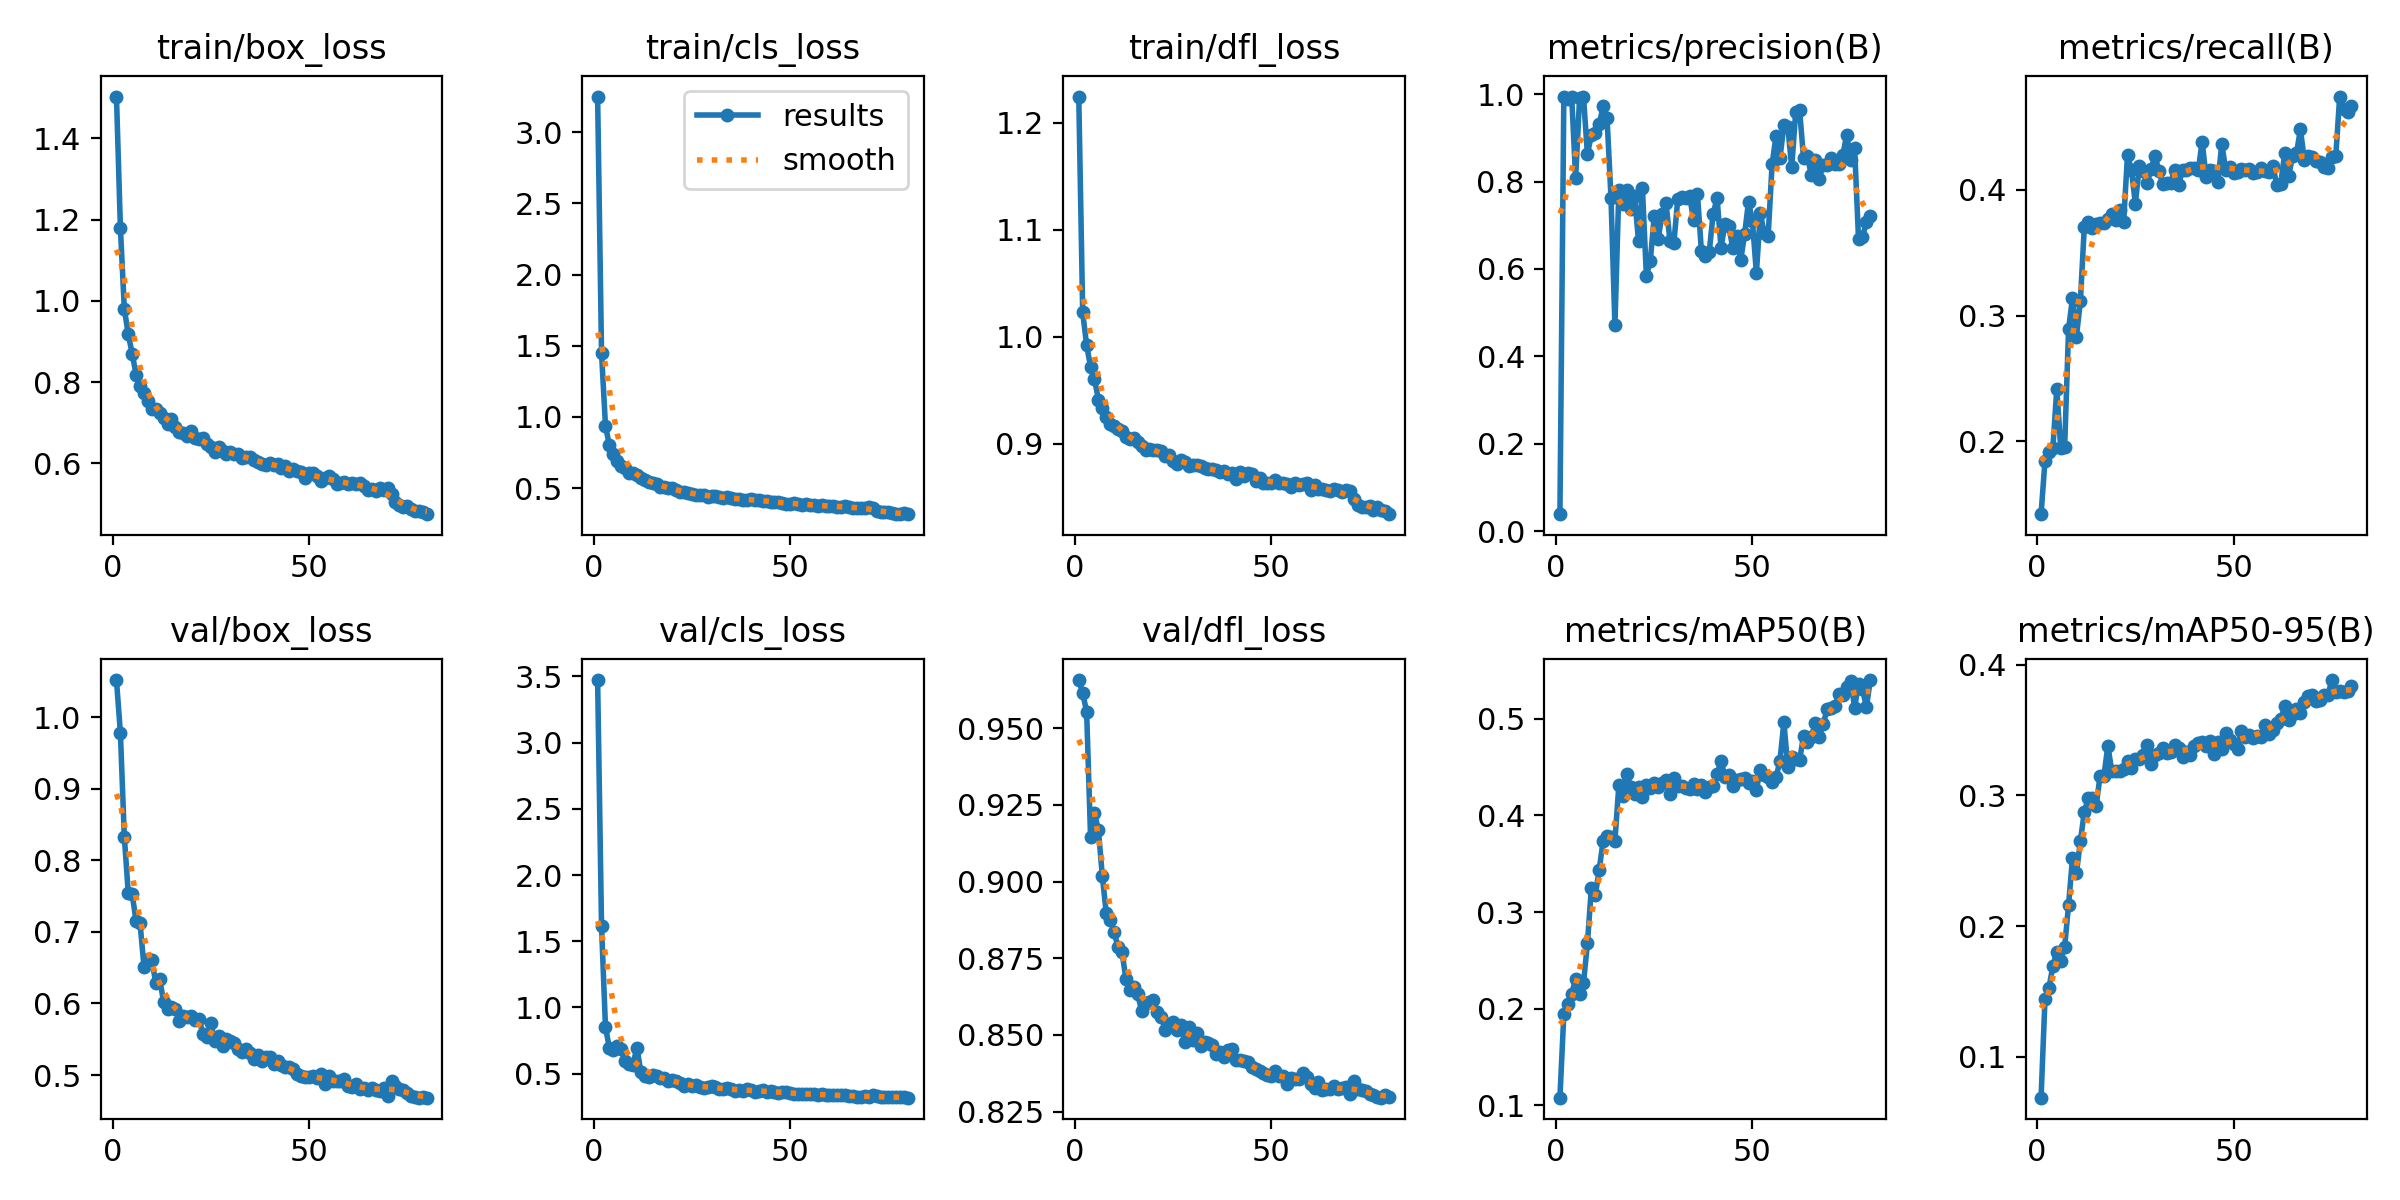

In [ ]:
display(Image(filename='/content/runs/detect/train/results.png', width=600))

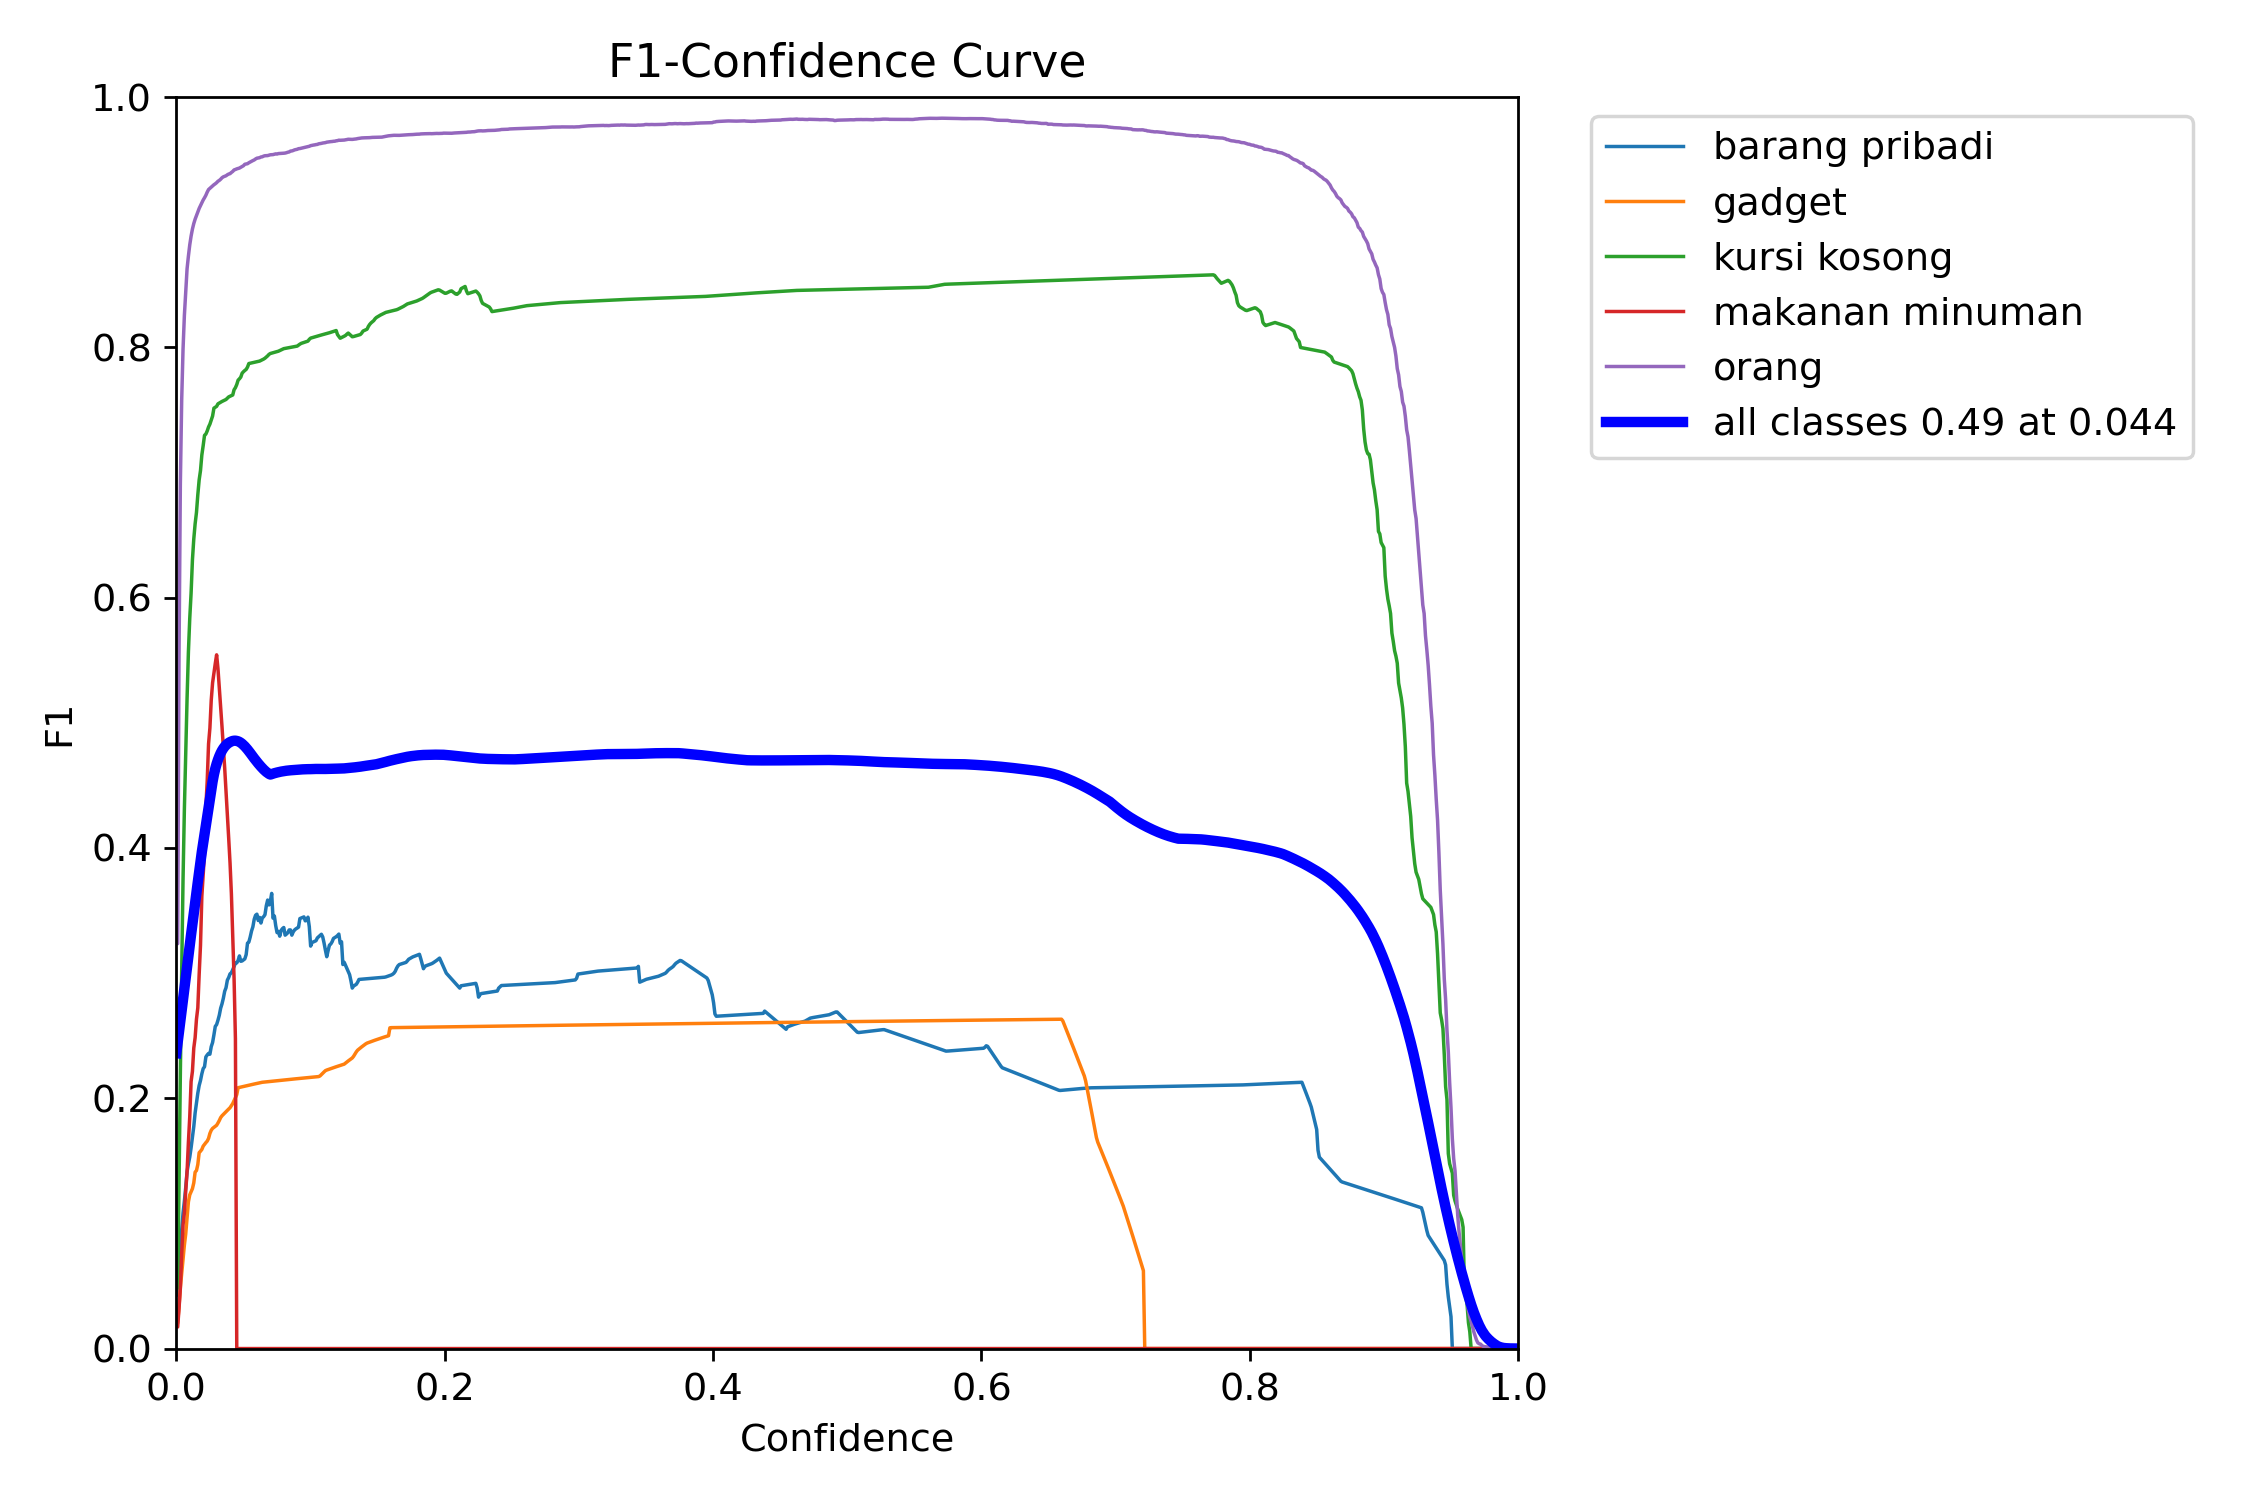

In [ ]:
display(Image(filename='/content/runs/detect/train/F1_curve.png', width=600))

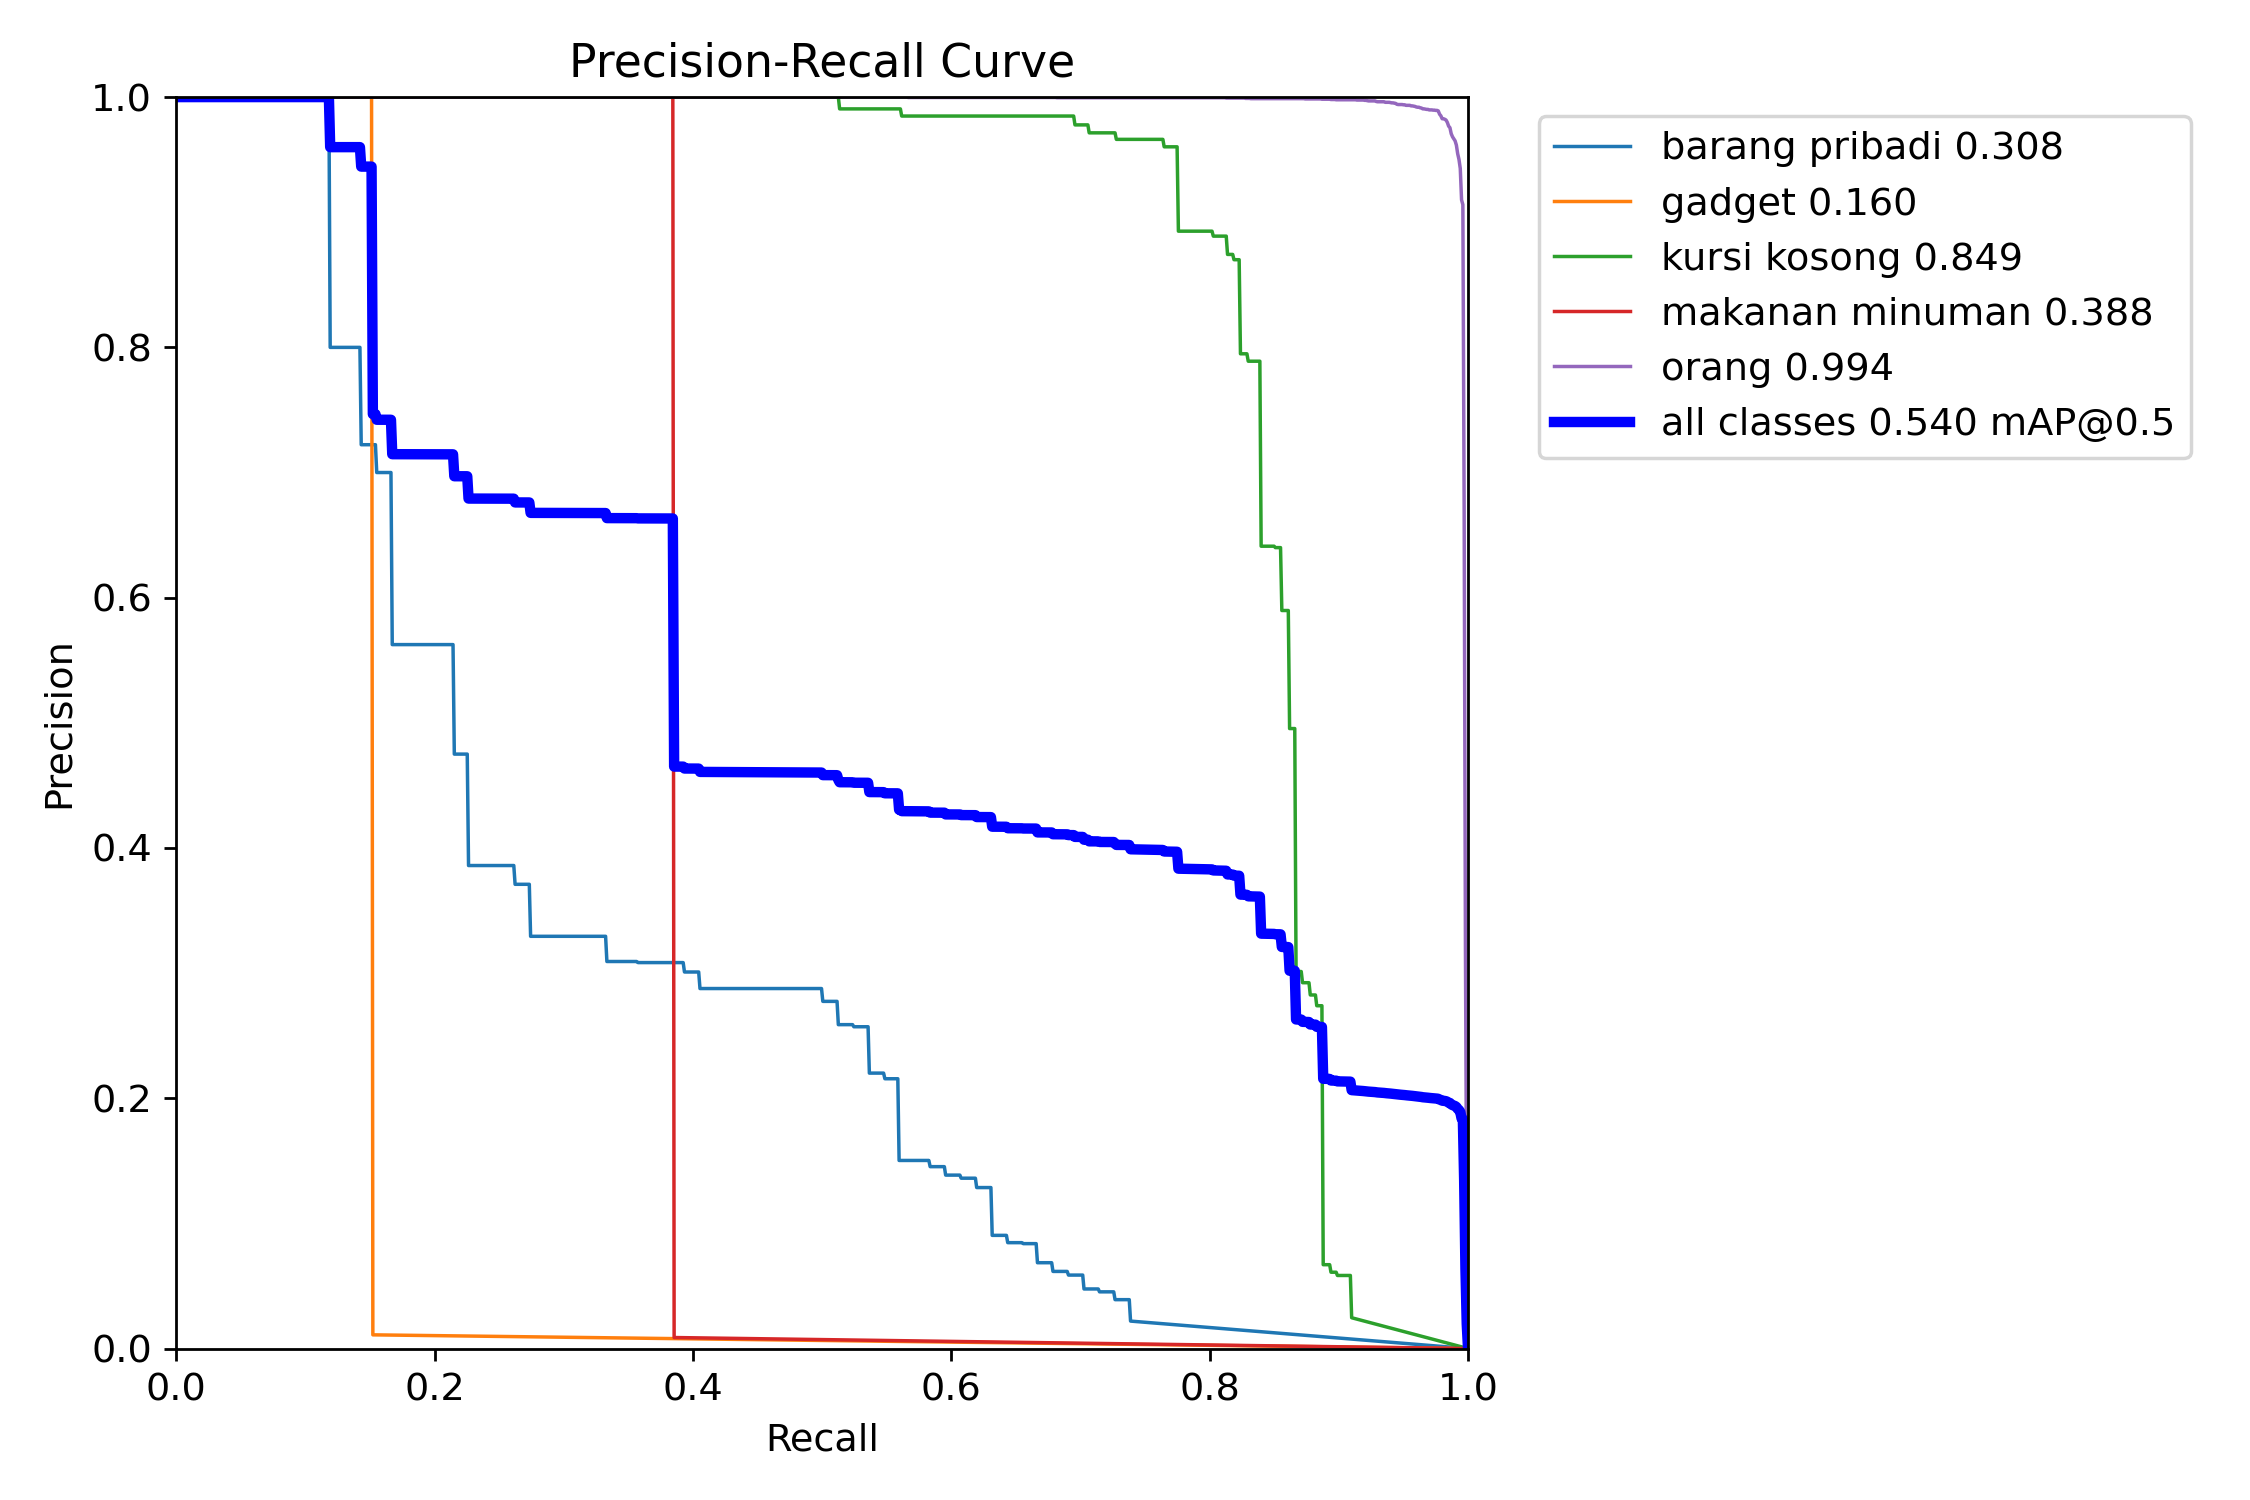

In [ ]:
display(Image(filename='/content/runs/detect/train/PR_curve.png', width=600))

### **Validate fine-tuned model**

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/data.yaml

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/valid/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100% 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 13/13 [00:09<00:00,  1.35it/s]
                   all        200       4887      0.849      0.426       0.54      0.386
        barang pribadi          9         84      0.467      0.214      0.307      0.174
                gadget          9         33      0.896      0.152       0.16     0.0827
          kursi kosong          9        187      0.913      0.775      0.849      0.645
       makanan minuman          9         13          1          0      0.388      0.121
                 orang        200       4570      0.968      0.988      0.994      0.906
Speed: 1.0ms preprocess, 4.8ms inference, 0.0ms loss, 5.3ms po

# **Inference with custom model**

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/test/images save=True

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs

image 1/100 /content/test/images/WhatsApp-Video-2024-10-19-at-05_54_03_e7b85089_mp4-0000_jpg.rf.f826036ca367010a6f143184217f01e0.jpg: 384x640 3 barang pribadis, 1 gadget, 30 kursi kosongs, 8 orangs, 54.7ms
image 2/100 /content/test/images/WhatsApp-Video-2024-10-19-at-05_54_03_e7b85089_mp4-0021_jpg.rf.82cc58592d06cc023754d528c144aa73.jpg: 384x640 3 barang pribadis, 1 gadget, 31 kursi kosongs, 8 orangs, 10.1ms
image 3/100 /content/test/images/WhatsApp-Video-2024-10-19-at-05_54_03_e7b85089_mp4-0032_jpg.rf.c996ed2d4ea08c74bf9b3bd6711380f5.jpg: 384x640 4 barang pribadis, 1 gadget, 31 kursi kosongs, 8 orangs, 9.5ms
image 4/100 /content/test/images/WhatsApp-Video-2024-10-19-at-05_54_03_e7b85089_mp4-0034_jpg.rf.07a7b0dc289b8ba0d486edc76ccd9890.jpg: 384x640 4 barang pribadis, 1 gadget, 31 kursi kosongs, 8 orangs, 9.4ms
image 5/100 

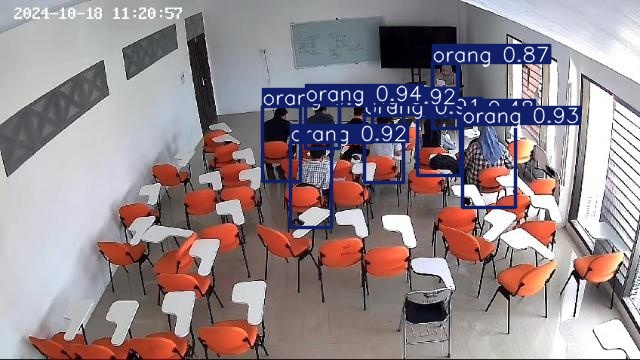

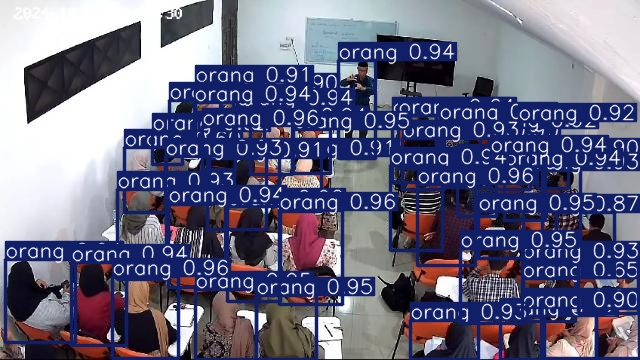

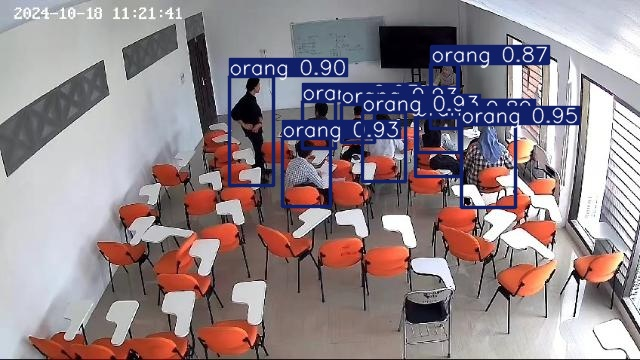

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
model = YOLO('/content/runs/detect/train/weights/best.pt')

In [ ]:
!pip install opencv-python
import cv2 # Importing the cv2 module
import glob
import os
from IPython.display import Image as IPyImage, display

video_path = '/content/Video shows Phoenix TSA agents attacked at Sky Harbor Airport (online-video-cutter.com).mp4'
output_path = '/content/CCTV_video.mp4'

cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

In [ ]:
out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

In [ ]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)
    annotated_frame = results[0].plot()
    out.write(annotated_frame)

cap.release()
out.release()


0: 384x640 8 orangs, 145.4ms
Speed: 4.8ms preprocess, 145.4ms inference, 1433.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 orangs, 9.2ms
Speed: 2.2ms preprocess, 9.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 orangs, 10.1ms
Speed: 2.7ms preprocess, 10.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 orangs, 10.3ms
Speed: 2.6ms preprocess, 10.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 orangs, 15.1ms
Speed: 2.8ms preprocess, 15.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 orangs, 10.7ms
Speed: 2.7ms preprocess, 10.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 orangs, 9.2ms
Speed: 3.1ms preprocess, 9.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 orangs, 9.4ms
Speed: 3.0ms preprocess, 9.4ms inference, 1.2ms postprocess per image at shape (1, 3,